In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

# Naive solution 



In [ ]:
def naive_prime_factorization(n):

    factors = []
     
    while n % 2 == 0: # if n is even
        factors.append(2)
        n = n / 2

    # find all the prime factors of n
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        while n % i == 0:
            factors.append(i)
            n = n / i

    # if n is a prime
    if n > 2:
        factors.append(n)

    return factors

def FindGCD1(m, n):

    # Step 1&2: Find the prime factors of m and n
    factors_m = naive_prime_factorization(m)
    factors_n = naive_prime_factorization(n)

    # Step 3: Find all the common prime factors
    common_factors = list((Counter(factors_m) & Counter(factors_n)).elements())

    # Step 4: Step 4 Compute the product of all the common prime factors and return it as gcd(m,n)
    gcd = 1
    for i in common_factors:
        gcd *= i

    return gcd, 

# Sieve of Eratosthenes

In [ ]:
def sieve_of_eratosthenes_prime_finder(n):

    sieve = [True] * (n + 1) # Create a sive of Eratosthenes of size n+1

    # First prime number is 2
    p = 2
    while p * p <= n:

        # If sieve[p] is not changed, then it is a prime
        if sieve[p]:

            # Update all multiples of p
            for i in range(p * p, n + 1, p):
                sieve[i] = False # i is not a prime
                
        p += 1

    # Return a list of prime numbers
    primes = []
    for p in range(2, n + 1):
        if sieve[p]:
            primes.append(p)

    return primes

def sieve_of_eratosthenes_prime_factorization(n):

    # Step 1: Find all the prime numbers less than or equal to n
    primes = sieve_of_eratosthenes_prime_finder(n)

    # Step 2: Find all the prime factors of n
    factors = []
    for i in primes:
        while n % i == 0:
            factors.append(i)
            n //= i

    return factors

def FindGCD2(m, n):

     # Step 1&2: Find the prime factors of m and n
    factors_m = sieve_of_eratosthenes_prime_factorization(m)
    factors_n = sieve_of_eratosthenes_prime_factorization(n)

    # Step 3: Find all the common prime factors
    common_factors = common_factors = list((Counter(factors_m) & Counter(factors_n)).elements())

    # Step 4 Compute the product of all the common prime factors and return it as gcd(m,n)
    gcd = 1
    for i in common_factors:
        gcd *= i

    return gcd

# Euclidean

In [ ]:
def FindGCD3(m, n):

    if m == 0 and n == 0: return 0
    if m == 0: return n
    if n == 0: return m
    if m == n: return m
    
    if m > n: 
         return FindGCD3(m % n, n)
    
    return FindGCD3(m, n % m)

# The moment of truth

In [ ]:
m = 8
n = 12

m = abs(m)
n = abs(n)

if m == 0 and n == 0:
    print("GCD of 0 and 0 is not defined")
else:
    start_time = time.time()
    gcd_1 = FindGCD1(m, n)
    end_time = time.time()
    print(f"GCD of {m} and {n} is {gcd_1}, time taken: {end_time - start_time} seconds")

    start_time = time.time()
    gcd_2 = FindGCD2(m, n)
    end_time = time.time()
    print(f"GCD of {m} and {n} is {gcd_2}, time taken: {end_time - start_time} seconds")

    start_time = time.time()
    gcd_3 = FindGCD3(m, n)
    end_time = time.time()
    print(f"GCD of {m} and {n} is {gcd_3}, time taken: {end_time - start_time} seconds")


In [ ]:
# Read input from file 
file_path = "test/Case1.txt"

with open(file_path, "r") as file:
    data = file.readlines()

    for line in data:
        m, n = map(int, line.split(", "))
       

        start_time = time.time()
        gcd_1 = FindGCD1(m, n)
        end_time = time.time()
        print(f"GCD of {m} and {n} is {gcd_1}, time taken: {end_time - start_time} seconds")

        start_time = time.time()
        gcd_2 = FindGCD2(m, n)
        end_time = time.time()
        print(f"GCD of {m} and {n} is {gcd_2}, time taken: {end_time - start_time} seconds")

        
        start_time = time.time()
        gcd_3 = FindGCD3(m, n)
        end_time = time.time()
        print(f"GCD of {m} and {n} is {gcd_3}, time taken: {end_time - start_time} seconds")



In [ ]:
with open("test/Extra Case1.txt", "r") as file:
    data = file.readlines()

    for line in data:
        values = [int(x) for x in line.split(",")]
        
        print(values)

        # Find gcd multiple times
        while len(values) >= 2:
            m, n = values.pop(0), values.pop(0)

            gcd_1 = FindGCD1(m, n)
            print(f"GCD of {m} and {n} is {gcd_1}")

            gcd_2 = FindGCD2(m, n)
            print(f"GCD of {m} and {n} is {gcd_2}")


            gcd_3 = FindGCD3(m, n)
            print(f"GCD of {m} and {n} is {gcd_3}")
            values.insert(0, gcd_3)

        print(values)

In [7]:
naive = np.array([])
sieve = np.array([])
euclid = np.array([])

test_case = 0


with open("test/Extra Case2 plotV2.txt", "r") as file:


    data = file.readlines()

    test_case = np.arange(1, 35 + 1)

    for i in range(0, 35):

        line = data[i]

        m, n = map(int, line.split(","))

        start_time = time.time()
        gcd_1 = FindGCD1(m, n)
        end_time = time.time()
        naive = np.append(naive, end_time - start_time)
        # print(f"GCD 1 {gcd_1}")

        start_time = time.time()
        gcd_2 = FindGCD2(m, n)
        end_time = time.time()
        sieve = np.append(sieve, end_time - start_time)
        # print(f"GCD 2 {gcd_2}")

        start_time = time.time()
        gcd_3 = FindGCD3(m, n)
        end_time = time.time()
        euclid = np.append(euclid, end_time - start_time)
        # print(f"GCD 3 {gcd_3}")

# print(naive)
# print(sieve)    
# print(euclid)

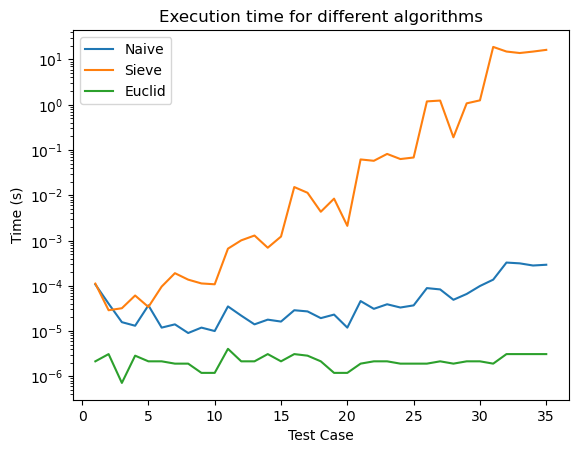

In [8]:
plt.plot(test_case, naive)
plt.plot(test_case, sieve)
plt.plot(test_case, euclid)

plt.ylabel('Time (s)')
plt.xlabel('Test Case')

plt.yscale("log")

plt.legend(['Naive', 'Sieve', 'Euclid'])
plt.title("Execution time for different algorithms")

plt.savefig('plot.png')
plt.show()

# save to file

# Performance Testing

In [ ]:
# Random 10 numbers
numbers = np.random.randint(10, 10000, 10)

# Performance testing 
def execute_pf_navie(number):

    execution_time = np.array([])

    for n in numbers:
        start_time = time.time()
        naive_prime_factorization(n)
        end_time = time.time()

        execution_time = np.append(execution_time, end_time - start_time)

    x_axis = numbers
    y_axis = execution_time

    # Plot the execution time
    fig, ax = plt.subplots()
    ax.scatter(x_axis, y_axis)

    for i in range(len(x_axis)):
        ax.annotate(x_axis[i], (x_axis[i], y_axis[i]))
    plt.ylabel('Execution time')
    plt.xlabel('Input')
    plt.title('Naive prime factorization')
    plt.show()

def execute_pf_sieve(number):

    execution_time = np.array([])

    for n in numbers:
        start_time = time.time()
        sieve_of_eratosthenes_prime_factorization(n)
        end_time = time.time()

        execution_time = np.append(execution_time, end_time - start_time)

    x_axis = numbers
    y_axis = execution_time

    # Plot the execution time

    fig, ax = plt.subplots()
    ax.scatter(x_axis, y_axis)

    for i in range(len(x_axis)):
        ax.annotate(x_axis[i], (x_axis[i], y_axis[i]))
    
    plt.ylabel('Execution time')
    plt.xlabel('Input')
    plt.title('Sieve of Eratosthenes prime factorization')
    plt.show()

execute_pf_navie(numbers)
execute_pf_sieve(numbers)

# Testing

In [ ]:
print(FindGCD2(120, 16))